# Step 1 - Import library, upload data, data exploration

### 1.1. Import library

In [1]:
import lib.step1ml_utilis_summaryPre_processing as pre
import lib.step7ml_utilis_NLP_Vietnamese as nlp
import matplotlib
import matplotlib_inline
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 1.2. Upload Data

In [2]:
#dir_file = "data_analysis/ReviewRaw.csv"
#names = ['customer_id','product_id','name','full_name','created_time','rating','title','content']
#f = pre.loadData(file_dir=dir_file, names=names)
#df = df.iloc[1: , :]
#data = df.copy()

import pandas as pd

df = pd.read_csv('data_analysis/ReviewRaw.csv', encoding='utf-8')
data = df.copy()
data.head()

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


### 1.3. Summary process
- 5 Dòng đầu tiên/ 5 dòng cuối => Xem dữ liệu thế và có cách nhìn về dữ liệu trước, phỏng đoán về dữ liệu
- Nhìn vào xem kiểu dữ liệu đúng chưa, nếu chưa cần phân tích tiếp
- Xem dữ liệu có những liệu lỗi không: NAN, NULL
- Có thể sử dụng thư viện profile report để nhìn qua dữ liệu và nó sẽ xuyên xuốt trong quá trình làm tiền xử lý dữ liệu
- Xem tỉ lệ dữ liệu duplicate => tìm hiểu nguyên nhân và cách xử lý nó => Thường thì sẽ xóa

In [3]:
# Xem 5 thông tin đầu
pre.startInformation(df=df,choose="head", head=5)

close


,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [4]:
# Xem tail
pre.startInformation(df=df,choose="tail", head=5)

close


,customer_id,product_id,name,full_name,created_time,rating,title,content
364089,130599,9996258,Vo Dung,Vo Dung,NaN,4,Hài lòng,NaN
364090,13104512,9996258,Chu Anh Phương,Chu Anh Phương,NaN,5,Cực kì hài lòng,NaN
364091,2053944,9996258,VND Nguyen,VND Nguyen,NaN,4,Hài lòng,ok
364092,1485301,9996258,Hung Vu,Hung Vu,NaN,5,Cực kì hài lòng,NaN
364093,312640,9996258,Phan Trường Hải,Phan Trường Hải,NaN,5,Cực kì hài lòng,NaN
364094,16820553,9996258,Quang Hng,Quang Hng,NaN,5,Cực kì hài lòng,NaN
364095,5888640,9996258,Phan Thanh Tú,Phan Thanh Tú,NaN,5,Cực kì hài lòng,NaN
364096,12246414,9996258,Nguyên Hồng,Nguyên Hồng,NaN,5,Cực kì hài lòng,NaN
364097,14309619,9996258,Justin H Chiem,Justin H Chiem,NaN,5,Cực kì hài lòng,NaN
364098,7948382,9996258,Lê Gia Dũng,Lê Gia Dũng,2018-09-07 20:36:07,5,Cực kì hài lòng,NaN


In [5]:
# Thông tin về dữ liệu
pre.startInformation(df=df,choose="info", head=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364099 entries, 0 to 364098
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   364099 non-null  int64 
 1   product_id    364099 non-null  int64 
 2   name          363669 non-null  object
 3   full_name     329471 non-null  object
 4   created_time  117340 non-null  object
 5   rating        364099 non-null  int64 
 6   title         364070 non-null  object
 7   content       165794 non-null  object
dtypes: int64(3), object(5)
memory usage: 22.2+ MB
close


In [6]:
# Xem dữ liệu có NAN
pre.startInformation(df=df,choose="nan")

close


customer_id          0
product_id           0
name               430
full_name        34628
created_time    246759
rating               0
title               29
content         198305
dtype: int64

In [7]:
# Xem dữ liệu null
pre.startInformation(df=df, choose="null")

close


customer_id          0
product_id           0
name               430
full_name        34628
created_time    246759
rating               0
title               29
content         198305
dtype: int64

In [8]:
# Xem dữ liệu bao nhiêu dòng và cột
pre.startInformation(df=df,choose="shape")

close


(364099, 8)

In [9]:
# Sự dụng thư viện profile report
#pre.startInformation(df=df,choose="profile")

In [10]:
# Xem tỉ lệ dữ liệu duplicate => Đưa ra quyết định hoặc tìm hiểu vì sao dữ liệu bị lỗi
pre.percentDuplicates(df=df)

close


0.00645

### Nhận xét:
- Tỉ lệ null/nan khá nhiều

### 1.4. Overview dữ liệu theo trực quan hóa và dataframe
- Trực quan hóa: dữ liệu là continious hay categorical
- Dataframe dữ liệu continious hay category: Biết được min và max/ NAS: dữ liệu nan và null / kiểu dữ liệu dự kiến
- Và biết về tương đối về dữ liệu

 Categerocial   Numerical   NaN 


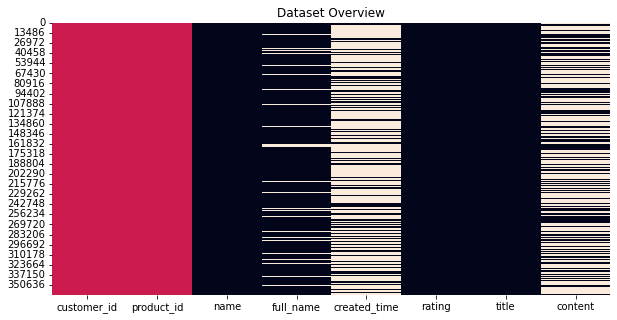

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [11]:
# Nhìn biểu đồ xem dự đoán xem dữ liệu continious hay category
pre.df_overview(df=df, choose="visualization")

In [12]:
# Trực quan hóa dữ liệu overview dataset
pre.df_overview(df=df, columns=['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (364099, 8)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,customer_id,Continious,Nas: 0(0%),Min-Max: (10)-(21013443)
1,product_id,Continious,Nas: 0(0%),Min-Max: (54665)-(81964004)
2,name,categorical,Nas: 430(0%),Categories: 165632
3,full_name,categorical,Nas: 34628(9%),Categories: 153708
4,created_time,categorical,Nas: 246759(67%),Categories: 92636
5,rating,categorical,Nas: 0(0%),Categories: 5
6,title,categorical,Nas: 29(0%),Categories: 27480
7,content,categorical,Nas: 198305(54%),Categories: 150821


### Nhận xét:
1. Sai kiểu dữ liệu
2. Dữ liệu bị duplicates

### Việc cần làm
1. Xử lý NLP cho các thuộc tính
2. Cleaning data
3. Thực hiện data analysis
4. Chỉnh dữ liệu sao cho phù hợp với bài toán

# Step 2 - Data Cleaning - Làm sạch dữ liệu

## A. Làm sạch dữ liệu với continious

### 2.1. Xem dữ liệu continious bị missing value và null 
- Dự đoán những thuộc tính là continious => làm 1 list liên quan đến lst_continious
- Dùng hàm filterSpecialCharacter thực hiện xem những ký tự đặc biệt trong dữ liệu
- Điều chỉnh dữ liệu bị ký hiệu đặc biệt bằng các hàm mode, median, mean hoặc để bằng 0 nếu không đúng => Nếu được dụng thuật toán
- Check lại những thuộc tính đã chỉnh
- Sau đó chuyển đổi kiểu dữ liệu => Nếu fail tìm nguyên nhân
- Làm sao kết quả cuối cùng là chuyển kiểu dữ liệu cho các thuộc tính kiểu continious không bị missing value


In [13]:
df.columns

Index(['customer_id', 'product_id', 'name', 'full_name', 'created_time',
       'rating', 'title', 'content'],
      dtype='object')

In [14]:
# Check các ký tự đặc biệt trong dữ liệu số
variable_continious = [ 'rating']
pre.filterSpecialCharacter(df=df[variable_continious])

close
close


,rating


### 2.2. Chuyển đổi dữ liệu missing value vs thuộc tính continious
- Chuyển dữ liệu qua hàm changeToAstype để xem dữ liệu đúng không và xem lại
- Cần xem lại thông tin xem kiểu dữ liệu đã ok chưa

In [15]:
# Chuyển kiểu dữ liệu cho thuộc tính
# Chuyển đổi dữ liệu date
lst_float = ['rating']
lst_int = []
lst_date = 'created_time'
pre.changeToAstype(df=df, lst_float=lst_float, lst_int=lst_int)
pre.changeToAstype_date(df=df, feature_date=lst_date)

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaT,3.0,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaT,5.0,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5.0,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaT,5.0,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaT,5.0,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."
...,...,...,...,...,...,...,...,...
364094,16820553,9996258,Quang Hng,Quang Hng,NaT,5.0,Cực kì hài lòng,NaN
364095,5888640,9996258,Phan Thanh Tú,Phan Thanh Tú,NaT,5.0,Cực kì hài lòng,NaN
364096,12246414,9996258,Nguyên Hồng,Nguyên Hồng,NaT,5.0,Cực kì hài lòng,NaN
364097,14309619,9996258,Justin H Chiem,Justin H Chiem,NaT,5.0,Cực kì hài lòng,NaN


## B. CLEANING BY FEATURE

#### 2.3. Xem lại thông tin dữ liệu lại
- Có bao nhiêu cột
- Giá trị trong cột thế nào dùng hàm: checkDtypesDataAndMissingvalues
- Overview dữ liệu lại 1 lần trước khi tiến hành việc khác
- Đưa ra nhận xét cho công việc tiếp theo

In [16]:
# Overview dữ liệu lại 1 lần nữa
#pre.df_overview(df=df,columns=['Feature', 'Type_Feature', 'NAS', 'Check_data'])

 Categerocial   Numerical   NaN 


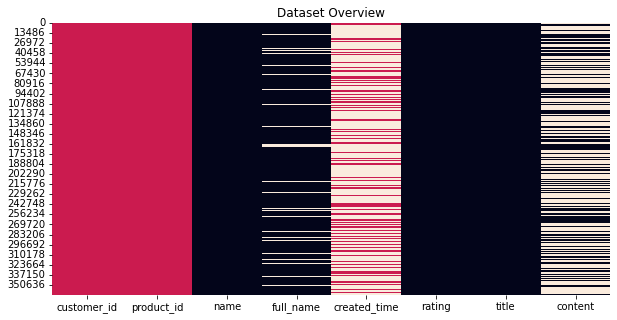

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [17]:
pre.df_overview(df=df, choose="visualization")

### Nhận xét:
1. Thuộc tính cần phải xem lại kiểu dữ liệu
2. Các biến categorical cần làm NLP

### 2.4. Detail Cleaning by feature
- Thứ tự thực hiện từng thuộc tính 1 từ trái sang phải

In [18]:
df.columns

Index(['customer_id', 'product_id', 'name', 'full_name', 'created_time',
       'rating', 'title', 'content'],
      dtype='object')

#### 2.4.1. customer_id

In [19]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='customer_id') 

close
close


Series([], Name: customer_id, dtype: int64)

In [20]:
# AveragePrice
fea_customer_id = pre.change_feature_seriesToDataframe(df=df, lst_feature='customer_id', names='fea_customer_id')
fea_customer_id = fea_customer_id.reset_index(drop=True)
fea_customer_id

,fea_customer_id
0,709310
1,10701688
2,11763074
3,9909549
4,1827148
...,...
364094,16820553
364095,5888640
364096,12246414
364097,14309619


#### 2.4.2. product_id

In [21]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='product_id') 

close
close


Series([], Name: product_id, dtype: int64)

In [22]:
# AveragePrice
fea_product_id = pre.change_feature_seriesToDataframe(df=df, lst_feature='product_id', names='fea_product_id')
fea_product_id = fea_product_id.reset_index(drop=True)
fea_product_id

,fea_product_id
0,10001012
1,10001012
2,10001012
3,10001012
4,10001012
...,...
364094,9996258
364095,9996258
364096,9996258
364097,9996258


#### 2.4.3. name

In [23]:
# Dữ liệu null
lst_continuous = ['name']
fea_name_0 = pre.changeMisingValueContinuous(df=df, choose='other', lst_continuous=lst_continuous)
fea_name_0

close


,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaT,3.0,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaT,5.0,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5.0,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaT,5.0,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaT,5.0,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."
...,...,...,...,...,...,...,...,...
364094,16820553,9996258,Quang Hng,Quang Hng,NaT,5.0,Cực kì hài lòng,NaN
364095,5888640,9996258,Phan Thanh Tú,Phan Thanh Tú,NaT,5.0,Cực kì hài lòng,NaN
364096,12246414,9996258,Nguyên Hồng,Nguyên Hồng,NaT,5.0,Cực kì hài lòng,NaN
364097,14309619,9996258,Justin H Chiem,Justin H Chiem,NaT,5.0,Cực kì hài lòng,NaN


In [24]:
# AveragePrice
fea_name_1 = pre.change_feature_seriesToDataframe(df=fea_name_0, lst_feature='name', names='fea_name_1')
fea_name_1 = fea_name_1.reset_index(drop=True)
fea_name_1

,fea_name_1
0,Lân Nguyễn Hoàng
1,Nguyễn Khánh Hòa
2,Toàn Phạm Khánh
3,Nguyen Quang Minh
4,Phạm Bá Đức
...,...
364094,Quang Hng
364095,Phan Thanh Tú
364096,Nguyên Hồng
364097,Justin H Chiem


#### 2.4.4. full_name

In [25]:
# Dữ liệu null
lst_continuous = ['full_name']
fea_full_name_0 = pre.changeMisingValueContinuous(df=df, choose='other', lst_continuous=lst_continuous)
fea_full_name_0

close


,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaT,3.0,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaT,5.0,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5.0,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,other,NaT,5.0,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaT,5.0,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."
...,...,...,...,...,...,...,...,...
364094,16820553,9996258,Quang Hng,Quang Hng,NaT,5.0,Cực kì hài lòng,NaN
364095,5888640,9996258,Phan Thanh Tú,Phan Thanh Tú,NaT,5.0,Cực kì hài lòng,NaN
364096,12246414,9996258,Nguyên Hồng,Nguyên Hồng,NaT,5.0,Cực kì hài lòng,NaN
364097,14309619,9996258,Justin H Chiem,Justin H Chiem,NaT,5.0,Cực kì hài lòng,NaN


In [26]:
# AveragePrice
fea_full_name_1 = pre.change_feature_seriesToDataframe(df=fea_full_name_0, lst_feature='name', names='fea_full_name_1')
fea_full_name_1 = fea_full_name_1.reset_index(drop=True)
fea_full_name_1

,fea_full_name_1
0,Lân Nguyễn Hoàng
1,Nguyễn Khánh Hòa
2,Toàn Phạm Khánh
3,Nguyen Quang Minh
4,Phạm Bá Đức
...,...
364094,Quang Hng
364095,Phan Thanh Tú
364096,Nguyên Hồng
364097,Justin H Chiem


#### 2.4.5. created_time

In [27]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='created_time') 

close
close


Series([], Name: created_time, dtype: datetime64[ns])

In [28]:
# Total_Volume
fea_created_time_1 = pre.change_feature_seriesToDataframe(df=df, lst_feature='created_time', names='fea_created_time_1')
fea_created_time_1

,fea_created_time_1
0,NaT
1,NaT
2,2019-04-17 15:42:45
3,NaT
4,NaT
...,...
364094,NaT
364095,NaT
364096,NaT
364097,NaT


In [29]:
fea_created_time_2 = pre.date_add_feature(df=fea_created_time_1, feature_date='fea_created_time_1')
fea_created_time_2

,fea_created_time_1,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily
0,NaT,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN
2,2019-04-17 15:42:45,2019.0,4.0,17.0,16.0,2.0
3,NaT,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
364094,NaT,NaN,NaN,NaN,NaN,NaN
364095,NaT,NaN,NaN,NaN,NaN,NaN
364096,NaT,NaN,NaN,NaN,NaN,NaN
364097,NaT,NaN,NaN,NaN,NaN,NaN


In [30]:
# Split datetime from InvoiceDate
fea_created_time_2['fea_date'] = fea_created_time_2['fea_created_time_1'].dt.date
fea_created_time_2['fea_time'] = fea_created_time_2['fea_created_time_1'].dt.time

In [31]:
fea_created_time_2 = fea_created_time_2.reset_index(drop=True)
fea_created_time_2

,fea_created_time_1,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_date,fea_time
0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,2019-04-17 15:42:45,2019.0,4.0,17.0,16.0,2.0,2019-04-17,15:42:45
3,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...
364094,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
364095,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
364096,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT
364097,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT


#### 2.4.6. rating

In [32]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=df, lst_feature='rating') 

close
close


Series([], Name: rating, dtype: float64)

In [33]:
# AveragePrice
fea_rating = pre.change_feature_seriesToDataframe(df=df, lst_feature='rating', names='fea_rating')
fea_rating = fea_rating.reset_index(drop=True)
fea_rating

,fea_rating
0,3.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
364094,5.0
364095,5.0
364096,5.0
364097,5.0


#### 2.4.7. title

In [34]:
# Dữ liệu null
lst_continuous = ['title']
fea_title_0 = pre.changeMisingValueContinuous(df=df, choose='other', lst_continuous=lst_continuous)
fea_title_0

close


,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaT,3.0,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaT,5.0,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5.0,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,other,NaT,5.0,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaT,5.0,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."
...,...,...,...,...,...,...,...,...
364094,16820553,9996258,Quang Hng,Quang Hng,NaT,5.0,Cực kì hài lòng,NaN
364095,5888640,9996258,Phan Thanh Tú,Phan Thanh Tú,NaT,5.0,Cực kì hài lòng,NaN
364096,12246414,9996258,Nguyên Hồng,Nguyên Hồng,NaT,5.0,Cực kì hài lòng,NaN
364097,14309619,9996258,Justin H Chiem,Justin H Chiem,NaT,5.0,Cực kì hài lòng,NaN


In [35]:
# AveragePrice
fea_title_1 = pre.change_feature_seriesToDataframe(df=fea_title_0, lst_feature='title', names='fea_title_1')
fea_title_1 = fea_title_1.reset_index(drop=True)
fea_title_1

,fea_title_1
0,Ko dùng đc thẻ nhớ
1,Cực kì hài lòng
2,Cực kì hài lòng
3,Rất hài lòng
4,Cực kì hài lòng
...,...
364094,Cực kì hài lòng
364095,Cực kì hài lòng
364096,Cực kì hài lòng
364097,Cực kì hài lòng


#### 2.4.8. content

In [36]:
# Dữ liệu null
lst_continuous = ['content']
fea_content_0 = pre.changeMisingValueContinuous(df=df, choose='other', lst_continuous=lst_continuous)
fea_content_0

close


,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaT,3.0,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaT,5.0,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5.0,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,other,NaT,5.0,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaT,5.0,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."
...,...,...,...,...,...,...,...,...
364094,16820553,9996258,Quang Hng,Quang Hng,NaT,5.0,Cực kì hài lòng,other
364095,5888640,9996258,Phan Thanh Tú,Phan Thanh Tú,NaT,5.0,Cực kì hài lòng,other
364096,12246414,9996258,Nguyên Hồng,Nguyên Hồng,NaT,5.0,Cực kì hài lòng,other
364097,14309619,9996258,Justin H Chiem,Justin H Chiem,NaT,5.0,Cực kì hài lòng,other


In [37]:
# Lọc dữ liệu và loại bỏ những dữ liệu không cần thiết ra khỏi NLP
fea_content_1 = nlp.process_nlp_vietnamese_no_number(df=fea_content_0, lst_text='content',columns_='fea_content_1')
fea_content_1 = fea_content_1.reset_index(drop=True)
fea_content_1

,fea_content_1
0,lúcđầu quên thông_tin nên dùng 512 gb thì ko đ...
1,tiki giao hàng nhanh sản_phẩm đúng như mô_tả g...
2,chất_lượng camera rõ nét chống mưa_nắng tuyệt_...
3,hàng được đóng_gói cẩn_thận giao hàng nhanhdễ ...
4,dễ cài_đặt chất_lượng tốt chế_độ xem hồng_ngoạ...
...,...
364094,other
364095,other
364096,other
364097,other


In [38]:
# Stop_word những từ không cần thiết ra khỏi dữ liệu
fea_content_2 = nlp.txt_stop_word(df=fea_content_1, lst_text='fea_content_1', columns_='fea_content_2')
fea_content_2 = fea_content_2.reset_index(drop=True)
fea_content_2

,fea_content_2
0,lúcđầu quên thông_tin 512 gb ko đc đọc kĩ 128 ...
1,tiki giao hàng sản_phẩm mô_tả giá_cả tốt camer...
2,chất_lượng camera nét chống mưa_nắng tuyệt_vời...
3,hàng đóng_gói cẩn_thận giao hàng nhanhdễ lắp_đ...
4,cài_đặt chất_lượng tốt chế_độ hồng_ngoại
...,...
364094,other
364095,other
364096,other
364097,other


In [39]:
# Stop_word những từ không cần thiết ra khỏi dữ liệu
fea_content_3 = nlp.txt_stop_word(df=fea_content_1, lst_text='fea_content_1', columns_='fea_content_3')
fea_content_3

,fea_content_3
0,lúcđầu quên thông_tin 512 gb ko đc đọc kĩ 128 ...
1,tiki giao hàng sản_phẩm mô_tả giá_cả tốt camer...
2,chất_lượng camera nét chống mưa_nắng tuyệt_vời...
3,hàng đóng_gói cẩn_thận giao hàng nhanhdễ lắp_đ...
4,cài_đặt chất_lượng tốt chế_độ hồng_ngoại
...,...
364094,other
364095,other
364096,other
364097,other


In [40]:
# Stop_word những từ không cần thiết ra khỏi dữ liệu
fea_content_4 = nlp.txt_stop_word(df=fea_content_2, lst_text='fea_content_2', columns_='fea_content_4')
fea_content_4

,fea_content_4
0,lúcđầu quên thông_tin 512 gb ko đc đọc kĩ 128 ...
1,tiki giao hàng sản_phẩm mô_tả giá_cả tốt camer...
2,chất_lượng camera nét chống mưa_nắng tuyệt_vời...
3,hàng đóng_gói cẩn_thận giao hàng nhanhdễ lắp_đ...
4,cài_đặt chất_lượng tốt chế_độ hồng_ngoại
...,...
364094,other
364095,other
364096,other
364097,other


## C. CONBINE DATA

### 1.1. Kết hợp data mới và data gốc thực hiện phân tích dữ liệu

In [41]:
import pandas as pd
lst_concat = [fea_customer_id, fea_product_id, fea_name_1, fea_full_name_1, fea_created_time_2, fea_rating, fea_title_1, fea_content_1, fea_content_2]
df_new = pd.concat(lst_concat, axis=1)
df_new

,fea_customer_id,fea_product_id,fea_name_1,fea_full_name_1,fea_created_time_1,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily,fea_date,fea_time,fea_rating,fea_title_1,fea_content_1,fea_content_2
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,3.0,Ko dùng đc thẻ nhớ,lúcđầu quên thông_tin nên dùng 512 gb thì ko đ...,lúcđầu quên thông_tin 512 gb ko đc đọc kĩ 128 ...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,5.0,Cực kì hài lòng,tiki giao hàng nhanh sản_phẩm đúng như mô_tả g...,tiki giao hàng sản_phẩm mô_tả giá_cả tốt camer...
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,2019.0,4.0,17.0,16.0,2.0,2019-04-17,15:42:45,5.0,Cực kì hài lòng,chất_lượng camera rõ nét chống mưa_nắng tuyệt_...,chất_lượng camera nét chống mưa_nắng tuyệt_vời...
3,9909549,10001012,Nguyen Quang Minh,Nguyen Quang Minh,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,5.0,Rất hài lòng,hàng được đóng_gói cẩn_thận giao hàng nhanhdễ ...,hàng đóng_gói cẩn_thận giao hàng nhanhdễ lắp_đ...
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,5.0,Cực kì hài lòng,dễ cài_đặt chất_lượng tốt chế_độ xem hồng_ngoạ...,cài_đặt chất_lượng tốt chế_độ hồng_ngoại
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364094,16820553,9996258,Quang Hng,Quang Hng,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,5.0,Cực kì hài lòng,other,other
364095,5888640,9996258,Phan Thanh Tú,Phan Thanh Tú,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,5.0,Cực kì hài lòng,other,other
364096,12246414,9996258,Nguyên Hồng,Nguyên Hồng,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,5.0,Cực kì hài lòng,other,other
364097,14309619,9996258,Justin H Chiem,Justin H Chiem,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,5.0,Cực kì hài lòng,other,other


### 1.2. Xóa dữ liệu duplicate

In [42]:
# Xóa dữ liệu double
data = pre.deleteDuplicates(df=df_new)
pre.percentDuplicates(df=data)

close
close


0

### 1.3. Xuất dữ liệu
- Dùng để làm bước tiếp theo phân tích data analysis

In [43]:
data.to_csv('data_analysis/ReviewRaw_processing.csv')